# Final Paper<a href="#Final-Paper" class="anchor-link">¶</a>

#### Group Members: Anuska Mondal, Yiu Ho (Peter) Tung, Chengze Xie, and Nara Valera-Simeon<a href="#Group-Members:-Anuska-Mondal,--Yiu-Ho-(Peter)-Tung,-Chengze-Xie,-and-Nara-Valera-Simeon" class="anchor-link">¶</a>

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

With vast improvements in health and technology in the 21st century,
people's life expectancy has expanded than they did just a few decades
ago. Researchers have looked at various demographic variables, GDP, and
mortality rates to study and predict life expectancy in countries around
the world. This data, however, included a few new variables that could
potentially be great predictors for life expectancy that have not been
studied before. These variables include immunization rates for diseases
like Hepatitis B, Polio, and Diphtheria, data from a range of years
(2000-2015) and not just from one year, and some Human Development Index
variables like schooling, and income composition of resources. The two
main questions we ask are: 1) Are health or monetary predictors better
for predicting the life expectancy of a country? 2) Which variable is
best in predicting life expectancy in developed countries…in developing
countries?

These questions will help in suggesting a country with which area should
be given importance in order to efficiently improve the life expectancy
of its population. If a country is poor, it needs to know exactly which
areas it can invest in to improve the longevity of its people.

## Data<a href="#Data" class="anchor-link">¶</a>

In \[69\]:

    import pandas as pd
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    import sklearn.linear_model as linmod
    import seaborn as sns


    df = pd.read_csv("data/Life_Expectancy_Data.csv")
    df.head(5)

Out\[69\]:

|     | Country     | Year | Status     | Life expectancy | Adult Mortality | infant deaths | Alcohol | percentage expenditure | Hepatitis B | Measles | ... | Polio | Total expenditure | Diphtheria | HIV/AIDS | GDP        | Population | thinness 1-19 years | thinness 5-9 years | Income composition of resources | Schooling |
|-----|-------------|------|------------|-----------------|-----------------|---------------|---------|------------------------|-------------|---------|-----|-------|-------------------|------------|----------|------------|------------|---------------------|--------------------|---------------------------------|-----------|
| 0   | Afghanistan | 2015 | Developing | 65.0            | 263.0           | 62            | 0.01    | 71.279624              | 65.0        | 1154    | ... | 6.0   | 8.16              | 65.0       | 0.1      | 584.259210 | 33736494.0 | 17.2                | 17.3               | 0.479                           | 10.1      |
| 1   | Afghanistan | 2014 | Developing | 59.9            | 271.0           | 64            | 0.01    | 73.523582              | 62.0        | 492     | ... | 58.0  | 8.18              | 62.0       | 0.1      | 612.696514 | 327582.0   | 17.5                | 17.5               | 0.476                           | 10.0      |
| 2   | Afghanistan | 2013 | Developing | 59.9            | 268.0           | 66            | 0.01    | 73.219243              | 64.0        | 430     | ... | 62.0  | 8.13              | 64.0       | 0.1      | 631.744976 | 31731688.0 | 17.7                | 17.7               | 0.470                           | 9.9       |
| 3   | Afghanistan | 2012 | Developing | 59.5            | 272.0           | 69            | 0.01    | 78.184215              | 67.0        | 2787    | ... | 67.0  | 8.52              | 67.0       | 0.1      | 669.959000 | 3696958.0  | 17.9                | 18.0               | 0.463                           | 9.8       |
| 4   | Afghanistan | 2011 | Developing | 59.2            | 275.0           | 71            | 0.01    | 7.097109               | 68.0        | 3013    | ... | 68.0  | 7.87              | 68.0       | 0.1      | 63.537231  | 2978599.0  | 18.2                | 18.2               | 0.454                           | 9.5       |

5 rows × 22 columns

This data was obtained from and compiled by Kaggle, but all of it is
public information that is reported by the World Health Organization
(WHO) and the United Nations. All of the health factor data is from the
Global Health Observatory of WHO, where it is made available for health
data analysis and the corresponding economic data is collected from the
UNC website. There is information from 193 countries over the span of 15
years, from 2000 to 2015. There are 22 columns and 2938 rows, with 20 of
the columns being potential predictors. All the variables are:

-   Country
-   Year
-   Status – Developed or Undeveloped
-   Life Expectancy – in Age
-   Adult Mortality - Probability of an adult dying between 15 and 60
    years per 1000 population \*what is the difference between
    probability and number of
-   Infant Deaths – number of infant deaths per 1000 population
-   Alcohol – recorded per capita consumption of pure alcohol, in liters
-   Percent Expenditure - Expenditure on health as a percentage of Gross
    Domestic Product per capita(%)
-   Hepatitis B - HepB immunization coverage among 1-year-olds (%)
-   Measles - number of reported cases per 1000 population
-   BMI - Average Body Mass Index of the entire population
-   Under-Five Deaths - Number of under-five deaths per 1000 population
-   Polio – Polio immunization coverage among 1-year-olds (%)
-   Total Expenditure - General government expenditure on health as a
    percentage of total government expenditure (%)
-   Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3)
    immunization coverage among 1-year-olds (%)
-   HIV/AIDS - Deaths per 1000 live births HIV/AIDS (0-4 years)
-   GDP - Gross Domestic Product per capita (in USD)
-   Population – Population of a country
-   Thinness 1- 19 years - Prevalence of thinness among children and
    adolescents for Age 10 to 19 (% )
-   Thinness 5- 9 years - Prevalence of thinness among children for Age
    5 to 9(%)
-   Income composition of resources - Human Development Index in terms
    of income composition of resources (index ranging from 0 to 1).
    Measure of how productively resources are being used.
-   Schooling - Number of years of Schooling(years)

Some of the names of the variables contained trailing spaces or
mismatched upper and lower cases. We went ahead and changed some of them
to make it readily accessible.

In \[74\]:

    df.rename(columns={" BMI ":"BMI","Life expectancy":"Life Expectancy","Adult Mortality":"Adult Mortality",
                       "infant deaths":"Infant Mortality","percentage expenditure":"Health Exp/GDP","Hepatitis B":"HepatitisB",
                      "Measles ":"Measles"," BMI ":"BMI","under-five deaths":"Under Five Deaths","Diphtheria ":"Diphtheria",
                      " HIV/AIDS":"HIV/AIDS","GDP":"GDP/capita","thinness  1-19 years":"Thinness 1-19 years","thinness 5-9 years":"Thinness 5-9 years","Income composition of resources":"Income Comp Of Resources",
                       "Total expenditure":"Health Exp/Gov Exp"},inplace=True)
    df.columns

Out\[74\]:

    Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
           'Infant Mortality', 'Alcohol', 'Health Exp/GDP', 'HepatitisB',
           'Measles', 'BMI', 'Under Five Deaths', 'Polio', 'Health Exp/Gov Exp',
           'Diphtheria', 'HIV/AIDS', 'GDP/capita', 'Population',
           'Thinness 1-19 years', 'Thinness 5-9 years', 'Income Comp Of Resources',
           'Schooling'],
          dtype='object')

Then we have to make sure that null values in the data set are dropped
so that they don't interfere while creating models. The second line of
the code shows that the first line worked and there are no more null
values in the data set.

In \[75\]:

    df = df.dropna()
    df.isnull().sum()*100/df.isnull().count()

Out\[75\]:

    Country                     0.0
    Year                        0.0
    Status                      0.0
    Life Expectancy             0.0
    Adult Mortality             0.0
    Infant Mortality            0.0
    Alcohol                     0.0
    Health Exp/GDP              0.0
    HepatitisB                  0.0
    Measles                     0.0
    BMI                         0.0
    Under Five Deaths           0.0
    Polio                       0.0
    Health Exp/Gov Exp          0.0
    Diphtheria                  0.0
    HIV/AIDS                    0.0
    GDP/capita                  0.0
    Population                  0.0
    Thinness 1-19 years         0.0
    Thinness 5-9 years          0.0
    Income Comp Of Resources    0.0
    Schooling                   0.0
    dtype: float64

Below are the distribution of all the variabless.

In \[76\]:

    all_col = ['Status', 'Life Expectancy', 'Adult Mortality',
           'Infant Mortality', 'Alcohol', 'Health Exp/GDP', 'HepatitisB',
           'Measles', 'BMI', 'Under Five Deaths', 'Polio', 'Health Exp/Gov Exp',
           'Diphtheria', 'HIV/AIDS', 'GDP/capita', 'Population',
           'Thinness 1-19 years', 'Thinness 5-9 years', 'Income Comp Of Resources',
           'Schooling']
    plt.figure(figsize=(15,75))

    for i in range(len(all_col)):
        plt.subplot(18,2,i+1)
        plt.hist(df[all_col[i]])
        plt.title(all_col[i])

    plt.show()

<img src="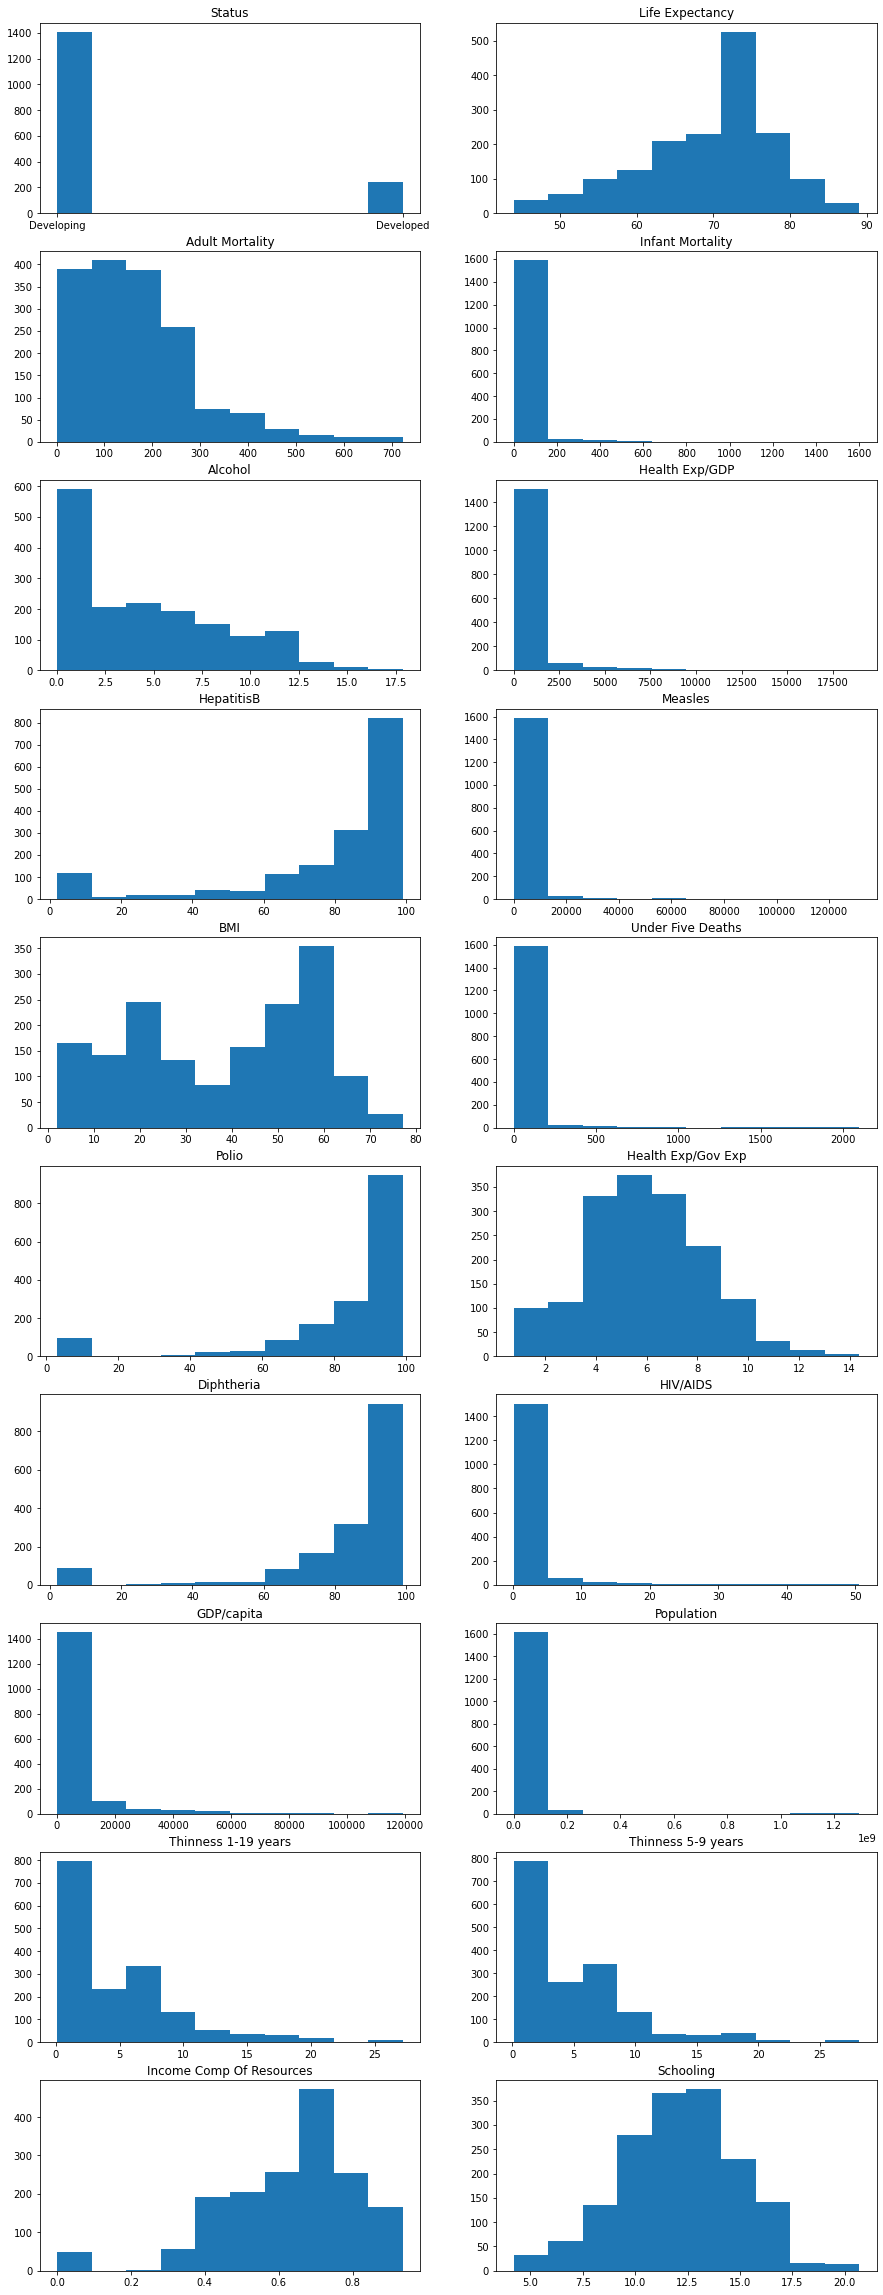%0A" class="jp-needs-light-background" />

This is a distribution of the life expectancy of all the countries in
the data set. Countries like Sweden and Austria have higher life
expectancies, while countries like Algeria and Zimbabwe have pretty low
ones.

In \[77\]:

    df_country = df.groupby('Country')['Life Expectancy'].mean()
    df_country.plot(kind='bar', figsize=(50,30), fontsize=25)
    plt.title("Life Expectancy",fontsize=40)
    plt.xlabel("Country",fontsize=35)
    plt.ylabel("Avg Life_Expectancy",fontsize=35)
    plt.show()

<img src="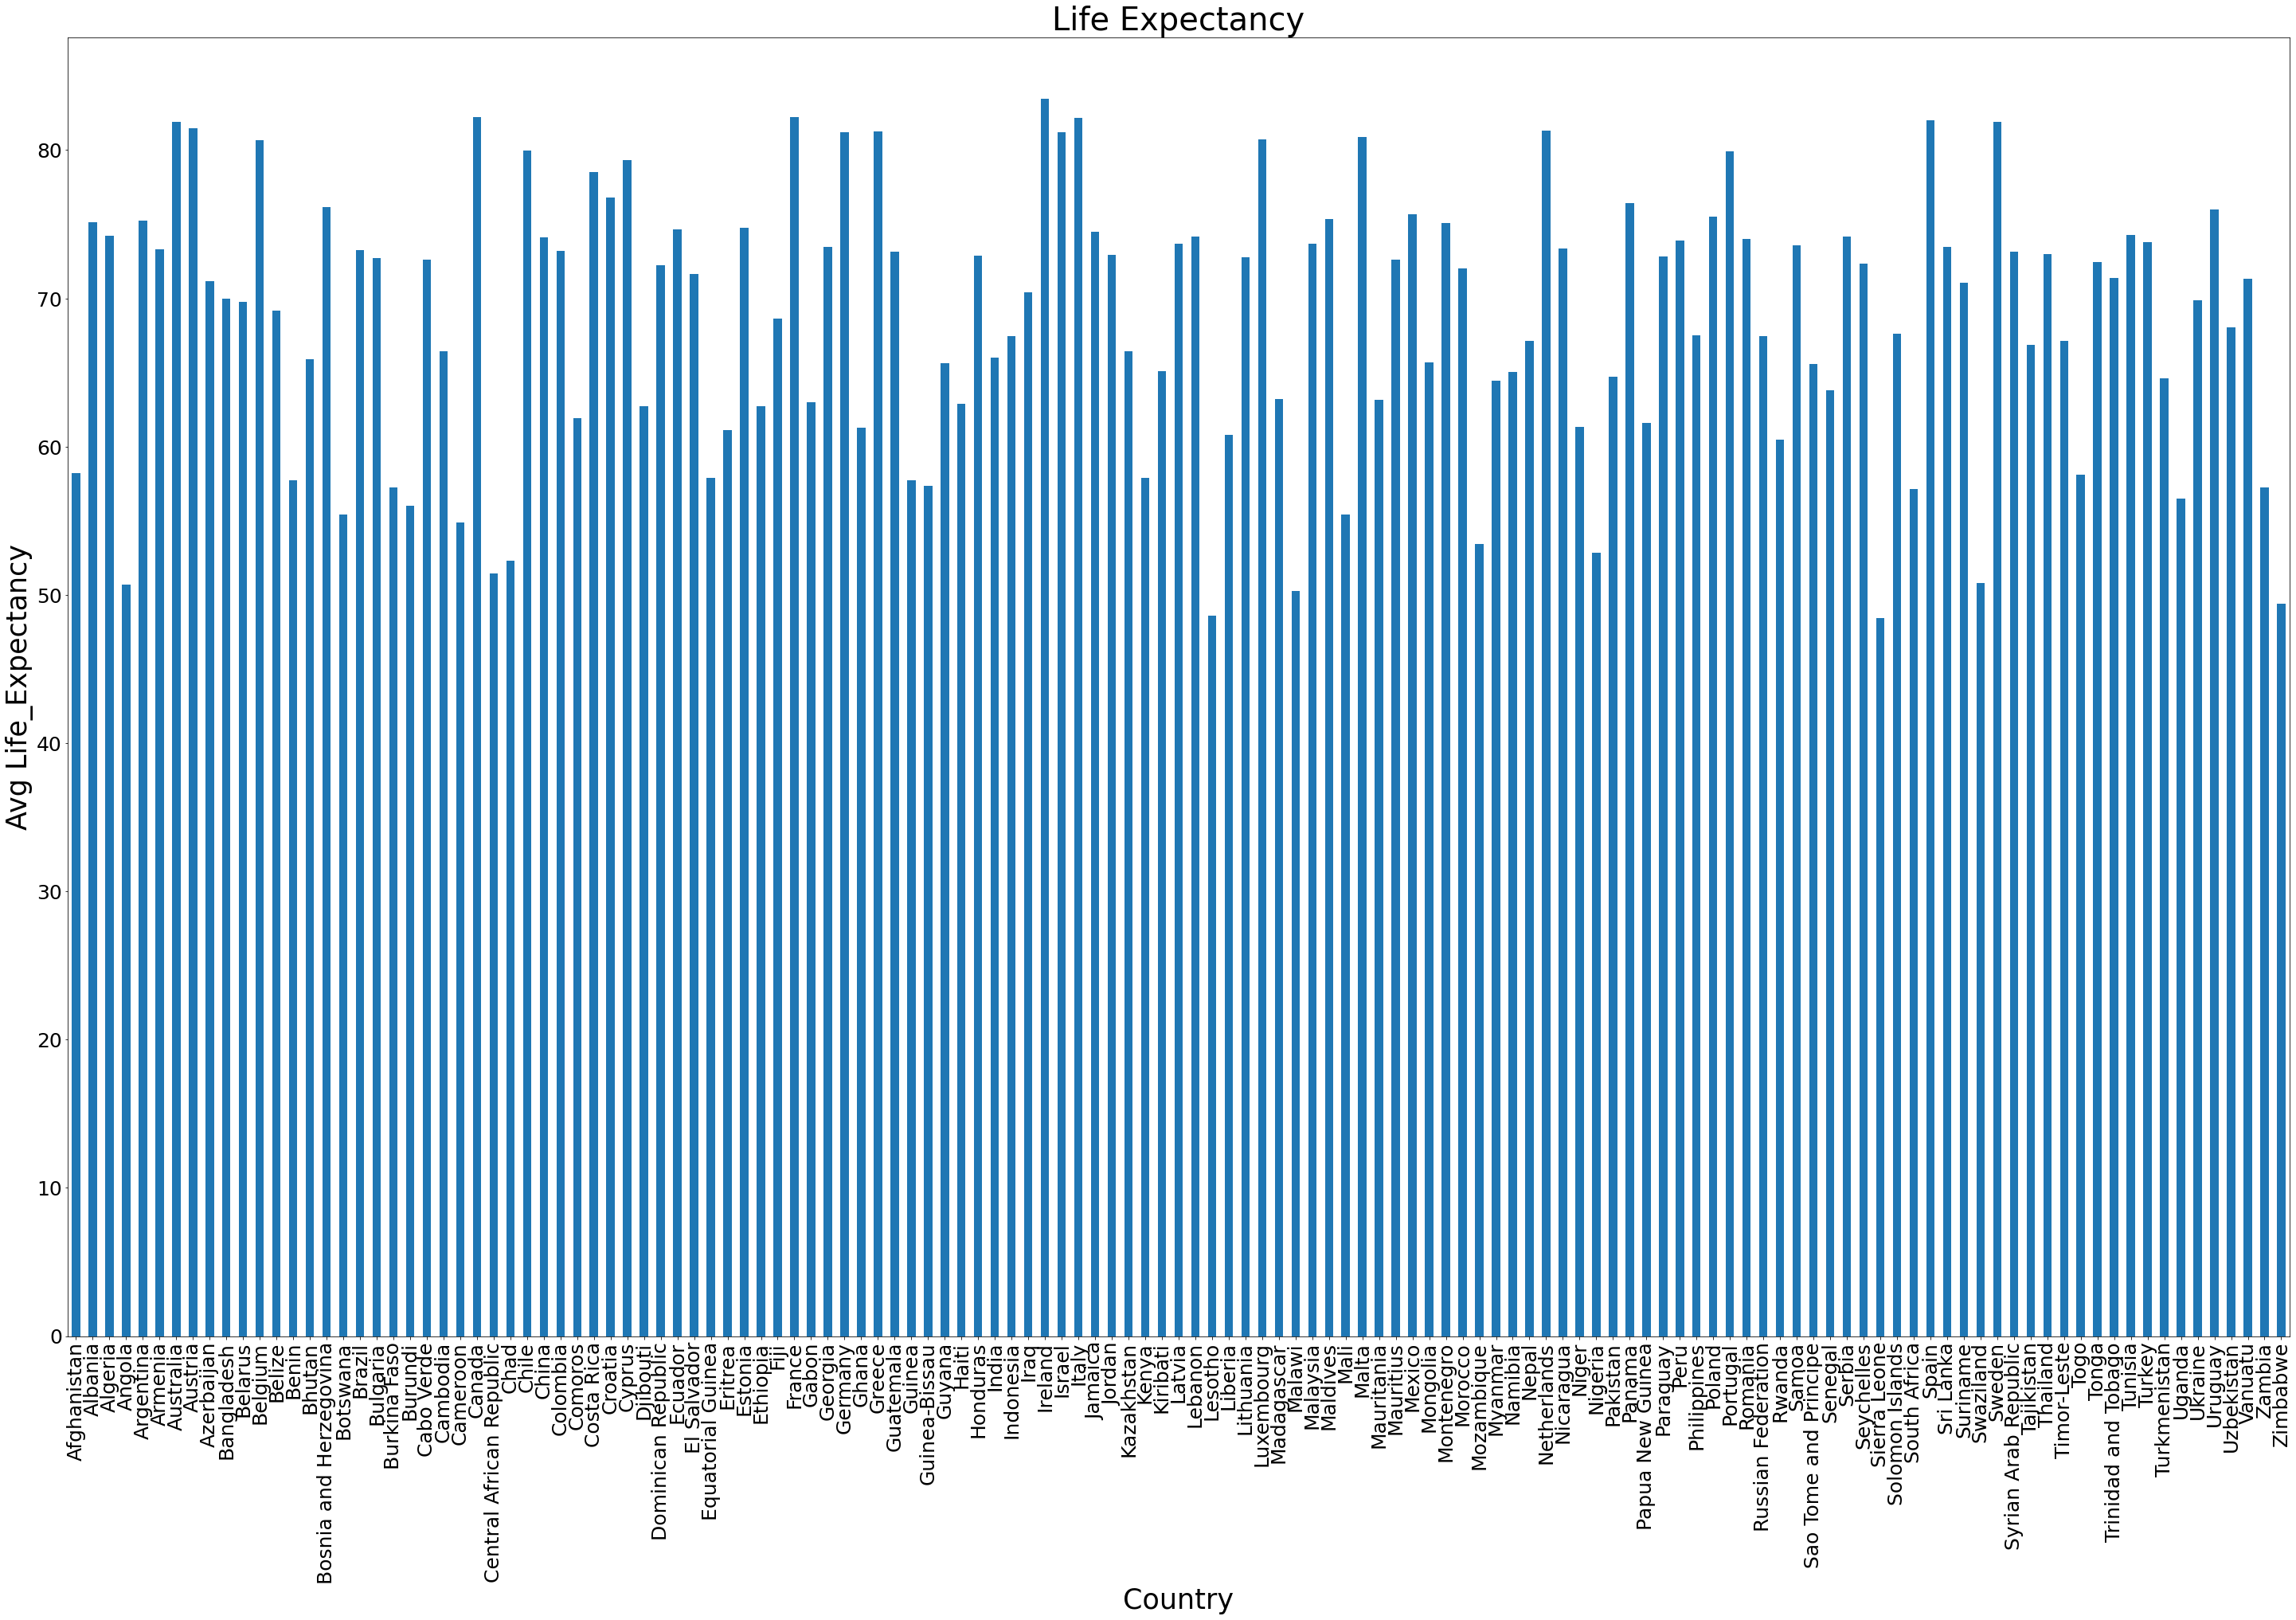%0A" class="jp-needs-light-background" />

## First Question<a href="#First-Question" class="anchor-link">¶</a>

### Are Health Predictors or Monetary Predictors better for predicting life expectancy of a country?<a href="#Are-Health-Predictors-or-Monetary-Predictors-better-for-predicting-life-expectancy-of-a-country?" class="anchor-link">¶</a>

The first step to approaching this question is to figure out which
predictors are going to be used and which are going into which category.
Obviously, life expectancy is our dependent variable thus it is not
going to be a predictor. The country is also not going to be a predictor
as it cannot be used as one. I also chose to eliminate year and
population as predictors since they would not fit into either health or
monetary categories and wouldn’t be good predictors anyway. A country
really cannot control the year they are in. If the results show
something like as the years increased, life expectancy increased, a
government cannot use that in any way to make policy and change.
Population would also be a problematic predictor to use as it varies
very much but doesn’t really provide anything useful. Two countries of
vastly different sizes could have the same population but if we don’t
accurately also factor in the size, we could be over or under estimating
results. Since we do not have the population per capita or even the
sizes of countries to figure it out, the population as a predictor could
vastly skew the data.

Next, we have to turn all the categorical variables in to binary
variable so that it can be used in a regression. The only categorical
varaible we have left is "Status", so now developing = 1 and developed =
0.

In \[60\]:

    df.drop(["Country", "Population", "Year"], axis=1, inplace=True)
    df["Status"] = np.where(df["Status"] == "Developing", 1, 0)
    df.head(5)

Out\[60\]:

|     | Status | Life Expectancy | Adult Mortality | Infant Mortality | Alcohol | Health Exp/GDP | HepatitisB | Measles | BMI  | Under Five Deaths | Polio | Health Exp/Gov Exp | Diphtheria | HIV/AIDS | GDP/capita | Thinness 1-19 years | Thinness 5-9 years | Income Comp Of Resources | Schooling |
|-----|--------|-----------------|-----------------|------------------|---------|----------------|------------|---------|------|-------------------|-------|--------------------|------------|----------|------------|---------------------|--------------------|--------------------------|-----------|
| 0   | 1      | 65.0            | 263.0           | 62               | 0.01    | 71.279624      | 65.0       | 1154    | 19.1 | 83                | 6.0   | 8.16               | 65.0       | 0.1      | 584.259210 | 17.2                | 17.3               | 0.479                    | 10.1      |
| 1   | 1      | 59.9            | 271.0           | 64               | 0.01    | 73.523582      | 62.0       | 492     | 18.6 | 86                | 58.0  | 8.18               | 62.0       | 0.1      | 612.696514 | 17.5                | 17.5               | 0.476                    | 10.0      |
| 2   | 1      | 59.9            | 268.0           | 66               | 0.01    | 73.219243      | 64.0       | 430     | 18.1 | 89                | 62.0  | 8.13               | 64.0       | 0.1      | 631.744976 | 17.7                | 17.7               | 0.470                    | 9.9       |
| 3   | 1      | 59.5            | 272.0           | 69               | 0.01    | 78.184215      | 67.0       | 2787    | 17.6 | 93                | 67.0  | 8.52               | 67.0       | 0.1      | 669.959000 | 17.9                | 18.0               | 0.463                    | 9.8       |
| 4   | 1      | 59.2            | 275.0           | 71               | 0.01    | 7.097109       | 68.0       | 3013    | 17.2 | 97                | 68.0  | 7.87               | 68.0       | 0.1      | 63.537231  | 18.2                | 18.2               | 0.454                    | 9.5       |

Next, we made a correlation map so that the variables can be scrutinized
deepper in order to see which ones we should eliminate further.

In \[61\]:

    cormat = df.corr()
    plt.figure(figsize=(15,15))
    sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
    plt.title("Correlation Map")
    plt.show()

<img src="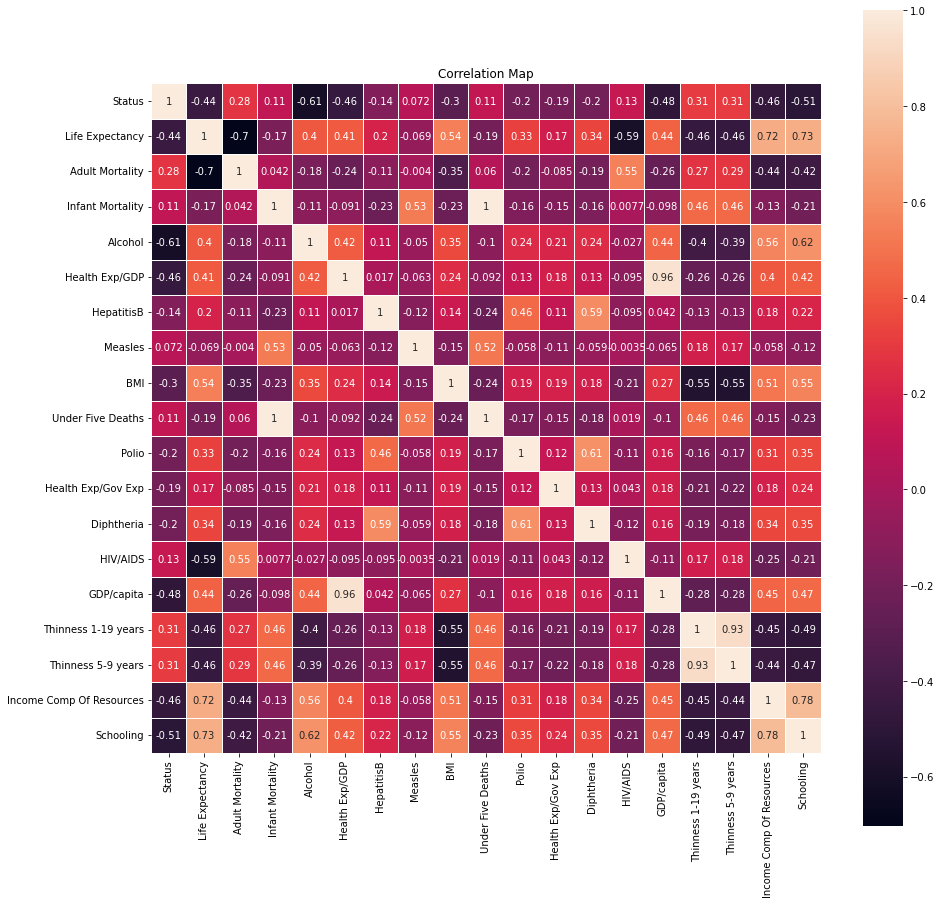%0A" class="jp-needs-light-background" />

We created a threshold that if any variable correlated with Life
Expectancy that was less than .10 would be eliminated from the predictor
list. When the correlation is already that low, it's inferable that it
is not going to have a substantial effect on the outcomes. Measles had a
-0.069 correlation with Life Expectancy, so I felt it was safe enough to
take it out.

The next step is to take out all the predictors that have an unusually
high correlation with each other. Infant Mortality and Under-5-Deaths
are perfectly correlated, this could severely modify and skew our
results, thus Infant Mortality is dropped from the predictors. I dropped
Infant Mortality instead of Under-5-Deaths because it has a correlation
of -.17 and the latter has a higher correlation of -.19. Another
unusually high correlation is between Health Expenditure per GDP per
capita and GDP per capita. Thus, I dropped GDP per capita, since the
variable of Health Expenditure is something a government can more
directly and easily control than GDP per capita. Lastly, another set of
variables that were highly correlated is Thinness 1-19 years and
Thinness 5-9 years. Since they have the exact same correlation with Life
Expectancy, it doesn't matter which one is dropped, I chose to drop
Thinness 1-19.

The final predictor that is going to be dropped is "Adult Mortality".
This variable is naturally going to be a good predictor of Life
Expectancy as it is directly death information. It is sort of a
different measure of the same thing to predict a response. Although
technically different the two variables, they can be constituted as
parallel, thus just to be safe, we're dropping Adult Mortality.

Health variables are going to include 'Alcohol', 'Hepatitis B', 'BMI',
'Polio', 'Diphtheria', 'HIV/AIDS', 'Under Five Deaths', and 'Thinness
5-9 years'. Monetary variables are 'Status', 'Health Exp/GDP','Health
Exp/Gov Exp','Income Comp Of Resources', and 'Schooling'. But the
division of variables is going to be done after the regression is run,
before that all the predictors are going to be X.

In \[78\]:

    #Descriptive Statistics of Life Expectancy
    des_LE = df["Life Expectancy"].describe()
    print(des_LE)

    count    1649.000000
    mean       69.302304
    std         8.796834
    min        44.000000
    25%        64.400000
    50%        71.700000
    75%        75.000000
    max        89.000000
    Name: Life Expectancy, dtype: float64

## Results<a href="#Results" class="anchor-link">¶</a>

To find which predictors are the "best", we have to find how they affect
life expectancy, and we can do that with a Multiple Regression Analysis.
Multiple regression is a statistical technique that can be used to
analyze the relationship between a single dependent variable and several
independent variables. The general form of a multiple regression
equation is

\$\$ \\hat{y} = \\beta_0 + \\beta x \$\$

where y is the dependent variable and x is the independent one. \$
\\beta0 \$ is the intercept and the \$\\beta\$ for x is the coefficient
dictating the equation which predicts y. In a multiple regression, there
isn't just one x, there are several, and they are all being used to
predict y. Each predictor value is weighed, the weights denoting their
relative contribution to the overall prediction. A multiple regression
equation looks like \$\$ \\hat{y} = \\beta_0 + \\beta 1 x_1 + \\beta 2
x_2 + \\beta 3 x_3 + ... \\beta n x_n \$\$

In this equation, the subscripts denote the different independent
variables. \$x_1\$ is the value of the first independent variable,
\$x_2\$ is the value of the second independent variable, and so on.

Before we start creating the model, the data needs to be split into a
training set and a testing set. We do this to make sure that our model
is actually accurate. For example, you teach a kid multiplication by
letting them train on a certain set of numbers and test whether the kid
is able to multiple with the same numbers. The results are great! The
kid got the right answers almost every time! But did the kid actually
know how to do multiplication, or did they just memorize the numbers?

In Machine Learning, we make a model which is nothing but an algorithm
where some parameters need to be modified such that it is able to
perform well at the application. We thus train the model using the
training data. The training data is the one which already has the actual
value that the model should have predicted and thus the algorithm
changes the value of parameters to account for the data in the training
set. Then we take the test data, for which we already know the values,
but the model has never seen this data before. Thus, if the model is
performing well on the test set too, we can say accurately say that the
model is good.

If the model is not tested and is made such that it just performs good
on training data then parameters will be such that they are only good
enough to predict the value for data that was in the training set. This
is called overfitting.

Below is the coding process of how we assigned our X and Y values and
then split the data.

In \[52\]:

    #splitting the data into training data and testing data
    from sklearn.model_selection import train_test_split as tts
    X= df[['HepatitisB','Alcohol', 'BMI','Polio', 
                'Diphtheria', 'HIV/AIDS',"Under Five Deaths", 
                'Thinness 5-9 years', 'Status', 'Health Exp/GDP','Health Exp/Gov Exp',
                'Income Comp Of Resources','Schooling']].values  #13 predictors
    y = df["Life Expectancy"].values
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

The next step is standardizing the data. Standardization is the process
of putting different variables on the same scale. Because we are going
to be comparing the beta values, we want to make sure they are all in
the same scale. This makes the variables actually comparable instead of
one weighing more than the other. We're also going to do a Rigde
Regression, so we're going to need standardized values. We are going to
standardize both our training and testing data. We have to do it to
both, otherwise, one set of data is going to be vastly different from
the other set and give us wonky results.

In \[80\]:

    #standardizing the values in the training data. 
    Z_train = X_train.copy()
    for i in range(13):
        mean = np.mean(X_train[:,i]) #training set mean for predictor i.
        std = np.std(X_train[:,i]) #training set standard deviation for predictor i.
        Z_train[:,i] = (Z_train[:,i] - mean)/std #standardization of predictors in the test set.
    mean = np.mean(y_train)
    std = np.std(y_train)
    yz_train = (y_train.copy()-mean)/std

    #standardizing the values in the testing data.
    Z_test = X_test.copy()
    for i in range(13):
        mean = np.mean(X_train[:,i]) #training set mean for predictor i.
        std = np.std(X_train[:,i]) #training set standard deviation for predictor i.
        Z_test[:,i] = (Z_test[:,i] - mean)/std #standardization of predictors in the test set.
    mean = np.mean(y_train)
    std = np.std(y_train)
    yz_test = (y_test.copy()-mean)/std

Now that we have the split and standardized data, we can run the
regression!

In \[81\]:

    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    reg1 = lm.fit(Z_train,yz_train)

    print("beta0 = ", lm.intercept_, ";   beta1-13 = " , lm.coef_)

    beta0 =  -3.3169663230743645e-16 ;   beta1-13 =  [-0.03458113 -0.10481286  0.11328889  0.03854752  0.06459321 -0.40092283
     -0.01920879 -0.02565155 -0.05471072  0.09556214  0.02581441  0.24462708
      0.34046855]

\$\$ \\hat{y_z} = -3.317 - 0.035z_1 - 0.105z_2 +0.113z_3 + 0.039z_4 +
0.065z_5 - 0.401z_6 - 0.019z_7 - 0.026z_8 - 0.055z_9 + 0.096z\_{10} +
0.026z\_{11} + 0.245z\_{12} + 0.340z\_{13} \$\$

We have a model, but how good is this model? To test that, we have to
fit our model to our (you guessed it!) testing data. And then score the
fitting based on the \$R^2\$ score. R-squared is a statistical measure
of how close the data are to the fitted regression line. It is also
known as the coefficient of determination, or the coefficient of
multiple determination for multiple regression. \$R^2\$ is the
percentage of the response variable variation that is explained by a
linear model. It is measured by dividing the Explained Variation by the
Total Variation. Explained variation is the difference between the
predicted value (y-hat) and the mean of already available ‘y’ values
(y-bar). It is the variation in ‘y’ that is explained by a regression
model. Total variation is the sum of unexplained variation and explained
variation, the difference between y and y-bar. The closer the \$R^2\$ is
to 1 the better our model is.

For a multiple regression model, R-squared increases or remains the same
as we add new predictors to the model, even if the newly added
predictors are independent of the target variable and don’t add any
value to the predicting power of the model. Adjusted R-squared
eliminates this drawback of R-squared. It only increases if the newly
added predictor improves the model’s predicting power. Adding
independent and irrelevant predictors to a regression model results in a
decrease in the adjusted R-squared.

So, after we fit the model in the test data set, we will score how
accurate it is by the \$R^2\$ value. If it's anywhere from .7 to .9,
then our model is pretty accurate.

In \[93\]:

    reg1 = lm.fit(Z_test,yz_test)
    r_sqr = 1 - (1-lm.score(Z_test,yz_test))*(len(yz_test)-1)/(len(yz_test)-Z_test.shape[1]-1)
    print("Adjusted R^2 =", r_sqr)

    Adjusted R^2 = 0.8244683105901134

The \$R^2\$ score is .824! This is a pretty great score and so now we
can go ahead to plot and interpreting our betas or coefficients.

In \[94\]:

    x_health = ['HepatitisB','Alcohol', 'BMI','Polio', 
                'Diphtheria', 'HIV/AIDS',"Under Five Deaths", 
                'Thinness 5-9 years']
    y_health = [-0.03458113, -0.10481286,  0.11328889,  0.03854752,  0.06459321, -0.40092283,
     -0.01920879, -0.02565155]

    x_mon = ['Status', 'Health Exp/GDP','Health Exp/Gov Exp',
                'Income Comp Of Resources','Schooling']
    y_mon = [-0.05471072,  0.09556214,  0.02581441,  0.24462708,
      0.34046855]

    predictor = ["Health", "Monetary"]
    plt.figure(figsize=(15,10))
    plt.bar(x_health, y_health);
    plt.bar(x_mon, y_mon);
    plt.legend(predictor,loc='upper left', prop={'size': 20}); 
    plt.xlabel("Predictors of Life Exepctancy")
    plt.ylabel("Beta Values")
    plt.xticks(rotation=45)
    plt.title("Beta Values of the Health and Monetary Predictors (MR)")

Out\[94\]:

    Text(0.5, 1.0, 'Beta Values of the Health and Monetary Predictors (MR)')

<img src="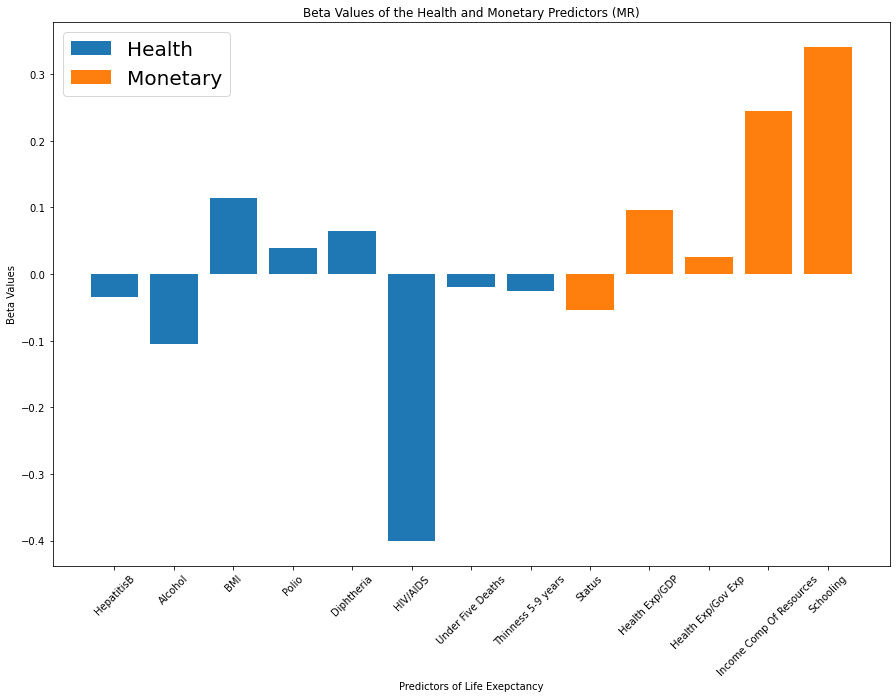%0A" class="jp-needs-light-background" />

As we can see from the bar graph, we have 8 health predictors and 5
monetary predictors. From the health side, HIV/AIDS leads the pack with
by far the biggest coefficient of -.40. It is followed by BMI at .11 and
Alcohol at .10. The rest of the health predictor beta values are very
small, less than .10. So, from health predictors, it can be safely
inferred that HIV/AIDS adds the most to the prediction model. As HIV
rates get higher, life expectancy decreases.

In the monetary predictors, schooling and income composition of
resources are the top predictors with their beta values being .34 and
.24, respectively. It is followed by health expenditure per GDP per
capita at .096. From this category, schooling and ICOR, contribute most
to the prediction model. As the rate of schooling and productive use of
resources gets higher, life expectancy increases.

This is incredibly useful data for governments of countries that are
experiencing low life expectancy rates. Governments should invest more
heavily in HIV/AIDS care. Lowering rates of this disease can potentially
raise its people's life expectancies. Parallelly, governments can also
invest in schooling and make better use of their resources to
significantly increase their people's life expectancy. This can be
investing and increasing young girls' and women's educations or
streamlining the use of their resources, if they have any, like oil,
wood, metals, etc.

In \[104\]:

    mean_health = np.mean(y_health)
    print("Mean Beta Values for Health Predictors", mean_health)
    sum_health = np.sum(y_health)
    print("Sum of Beta Values for Health Predictors", sum_health)

    mean_mon = np.mean(y_mon)
    print("Mean Beta Values for Monetary Predictors", mean_mon)
    sum_mon = np.sum(y_mon)
    print("Sum of Beta Values for Monetary Predictors", sum_mon)

    Mean Beta Values for Health Predictors -0.0460934425
    Sum of Beta Values for Health Predictors -0.36874754
    Mean Beta Values for Monetary Predictors 0.130352292
    Sum of Beta Values for Monetary Predictors 0.65176146

### Ridge Regression<a href="#Ridge-Regression" class="anchor-link">¶</a>

We wanted to do another prediction model, a Ridge Regression, to compare
the beta values of the predictors. We want to see how strong and true
our standard Multiple Regression was, and if we can get a better model
by doing another type of regression.

Because as data dimensionality increases, the risk of overfitting and
ill-conditioning increases, L1 or L2 regularization is added to make the
weights as small as possible, and finally a model with relatively small
parameters is constructed. Because it is generally believed that the
model with small parameter value is relatively simple, it can adapt to
different data sets and avoid the over-fitting phenomenon to a certain
extent. Therefore, for reducing the variance of data, we choose L2
Regularization (Ridge Regression) to find an appropriate coeffiecients
of standardized data of all variables we picked to predict the life
expectancy.

Most of the work is already done. We have already standa and split the
data, now we will just run the regression using Python.

In \[87\]:

    from sklearn.model_selection import RepeatedKFold
    lambdas = np.linspace(1,100,1001)
    #We set up a substantially large list of lambdas. This may cause cross-validation to take some time.
    folds = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
    #These are the parametres for the k-fold cross-validation process. You can repeat it multiple times to produce
    #a lower variance estimate of test score. We chose 5-fold with 3 repeats.
    ridge_model = linmod.RidgeCV(alphas=lambdas, cv=folds, scoring="r2")
    #Specifies the Ridge-Regression cross-validation process by assigning the earlier specified parametres. 
    #We also choose R^2 scoring for evaluating the different models.
    ridge_model.fit(Z_train, yz_train)
    #Finally, we fit the data.
    print("Best lambda = ", ridge_model.alpha_) 
    print("Intercept = ", ridge_model.intercept_)
    print("Slopes = ", ridge_model.coef_)

    Best lambda =  22.384
    Intercept =  -3.2718237218053105e-16
    Slopes =  [-0.03200169 -0.09741502  0.11490189  0.03953454  0.06362784 -0.39531919
     -0.01907679 -0.02782669 -0.05435692  0.09538644  0.02538478  0.24408965
      0.32964528]

For rigde_regression, we use Cross-validation to determine the
hyperparameter, which is lamda(22.384).

Now, we are going to see how strong our model is. The R^score was .78 in
our training data and .82 on the testing data. This is great, it means
that our model is strong!

In \[88\]:

    from sklearn.metrics import r2_score
    best_Rmod = linmod.Ridge(alpha=ridge_model.alpha_)
    best_Rmod.fit(Z_train, yz_train)
    best_Rmod_yhat = best_Rmod.predict(Z_train)
    ridge_test_r2 = r2_score(yz_train, best_Rmod_yhat)
    print("Test R^2 =  ", ridge_test_r2)

    Test R^2 =   0.7825080776500792

In \[89\]:

    #find r^2 score
    from sklearn.metrics import r2_score
    best_Rmod = linmod.Ridge(alpha=ridge_model.alpha_)
    best_Rmod.fit(Z_train, yz_train)
    best_Rmod_yhat = best_Rmod.predict(Z_test)
    ridge_test_r2 = r2_score(yz_test, best_Rmod_yhat)
    print("Test R^2 =  ", ridge_test_r2)

    Test R^2 =   0.8212847938254899

In \[90\]:

    x_health = ['HepatitisB','Alcohol', 'BMI','Polio', 
                'Diphtheria', 'HIV/AIDS',"Under Five Deaths", 
                'Thinness 5-9 years']
    y_health = [-0.03200169, -0.09741502,  0.11490189,  0.03953454,  0.06362784, -0.39531919,
     -0.01907679, -0.02782669]

    x_mon = ['Status', 'Health Exp/GDP','Health Exp/Gov Exp',
                'Income Comp Of Resources','Schooling']
    y_mon = [-0.05435692,  0.09538644,  0.02538478,  0.24408965,
      0.32964528]
    predictor = ["Health", "Monetary"]
    plt.figure(figsize=(15,10))
    plt.bar(x=x_health, height =y_health);
    plt.bar(x=x_mon, height =y_mon);
    plt.legend(predictor,loc='upper left', prop={'size': 20}); 
    plt.xlabel("Predictors of Life Exepctancy")
    plt.ylabel("Beta Values")
    plt.xticks(rotation=45)
    plt.title("Beta Values of the Health and Monetary Predictors (Ridge)")

Out\[90\]:

    Text(0.5, 1.0, 'Beta Values of the Health and Monetary Predictors (Ridge)')

<img src="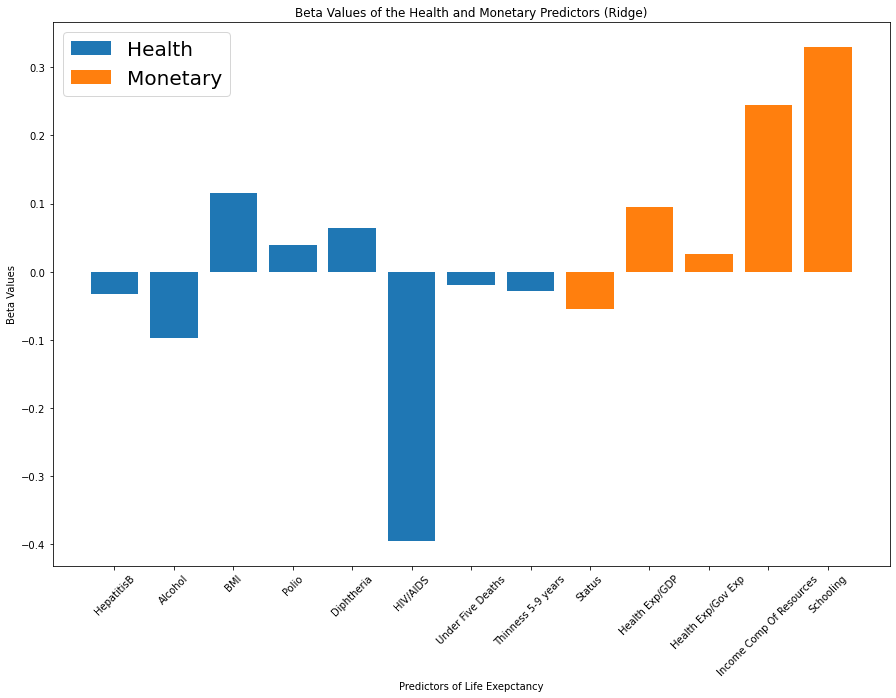%0A" class="jp-needs-light-background" />

From the health side, HIV/AIDS again has the highest beta value with
leads the pack with by far the biggest coefficient of -.395. It is
followed by BMI at .115 and Alcohol at .097.

In the monetary predictors, schooling and income composition of
resources are again the top predictors with their beta values being .330
and .244, respectively. It is followed by health expenditure per GDP per
capita at .096.

The beta values remain the the same in the same order and the \$R^2\$
did not get much higher, but we think this is due to some overfitting in
the Multiple Regression due to multicollinearity. We have predictors in
our data set that have correlation with each other, plus other factors
that can lead to overfitting in the previous regression model. This
would mean our \$R^2\$ could have been a little too good due to
overfitting. That is why we used Ridge Regression. We can use
regularization to decrease the variance of the variables. The \$R^2\$
score for our second model is more trustworthy, making our findings more
trustworthy.

## Question 2<a href="#Question-2" class="anchor-link">¶</a>

### Which variable is best in predicting life expectancy in developed countries… in developing countries?<a href="#Which-variable-is-best-in-predicting-life-expectancy-in-developed-countries%E2%80%A6-in-developing-countries?" class="anchor-link">¶</a>

Preperation Step:

First, we took out "Adult Mortality", "infant deaths", and "under-five
deaths" variables as we think those variables are cheating in answering
our question.

Second, we got rid of observation with missing value.

In \[97\]:

    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split as tts
    from sklearn.linear_model import LinearRegression
    import sklearn.linear_model as linmod
    from sklearn.metrics import r2_score

    df = pd.read_csv("data/Life_Expectancy_Data.csv") #Read csv
    df_col = df.columns #columns name
    newdf = df.drop(columns = ["Country","Year", "Adult Mortality", "infant deaths","under-five deaths"]) #drop columns the following columns
    newerdf = newdf.dropna() #drop any nan value in dataset

Then, we subsetted our data into 2 parts (a data frame with just
"developed" countries, and a data frame with just "developing"
countries).

To answer our question, we first look at which variable is best in
determining the life expectancy for developed country using Lasso
Regression because of its build-in variable selections function.

## Data<a href="#Data" class="anchor-link">¶</a>

In \[98\]:

    {
        "tags": [
            "hide-input",
        ]
    }

    #data frame with just developed countries
    developed = newerdf[newerdf["Status"] == "Developed"].copy() #developed countries subset
    developdf = developed.drop(columns = ["Status"]).copy()

    #Standardization step for developdf
    #Standardization of the training
    p = developdf.shape[1]-1
    from sklearn.model_selection import train_test_split
    X=developdf.iloc[:,1:p+1].values
    y = developdf["Life expectancy"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

    #Standardization of the training
    Z_train = X_train.copy()
    for i in range(15): #15 predictors
        mean = np.mean(X_train[:,i]) #training set mean for predictor i.
        std = np.std(X_train[:,i]) #training set standard deviation for predictor i.
        Z_train[:,i] = (Z_train[:,i] - mean)/std #standardization of predictors in the test set.
    mean = np.mean(y_train)
    std = np.std(y_train)
    yz_train = (y_train.copy()-mean)/std

    #Standardization of the testing relatively to the training
    Z_test = X_test.copy()
    for i in range(15): #15 predictors
        mean = np.mean(X_train[:,i]) #training set mean for predictor i.
        std = np.std(X_train[:,i]) #training set mean for predictor i.
        Z_test[:,i] = (Z_test[:,i] - mean)/std #standardization of predictors in the test set.
    mean = np.mean(y_train)
    std = np.std(y_train)
    yz_test = (y_test.copy()-mean)/std


    #Lasso Regression for developdf
    from sklearn.model_selection import RepeatedKFold
    folds = RepeatedKFold(n_splits=10, n_repeats=5, random_state= 0)

    lambdas=np.logspace(-10,-1.4,1000)
    lasso_model = linmod.LassoCV(alphas=lambdas, cv=folds)
    lasso_model.fit(Z_train, yz_train)
    print("Best lambda (developed) = ", lasso_model.alpha_) 
    print("Intercept (developed) = ", lasso_model.intercept_)
    print("Slopes (developed) = ", lasso_model.coef_)
    lasso_lamba = lasso_model.alpha_
    lasso_slopes = lasso_model.coef_


    best_Lmod = linmod.Lasso(alpha=lasso_model.alpha_)
    best_Lmod.fit(Z_train, yz_train)
    best_Lmod_yhat = best_Lmod.predict(Z_test)
    LASSO_test_r2 = r2_score(yz_test, best_Lmod_yhat)
    print("Test R^2 (developed) =  ", LASSO_test_r2)
    lasso_r2 = LASSO_test_r2


    coef = []
    intercept = []
    plot_lambdas = np.logspace(-1,0.5,100)
    for i in plot_lambdas:
        ls = linmod.Lasso(alpha=i)
        ls.fit(Z_train, yz_train)
        coef.append(ls.coef_) 
        intercept.append(ls.intercept_)
    plt.figure(figsize=(10,8))
    plt.plot(plot_lambdas, intercept, label="Intercept")
    plt.plot(plot_lambdas, coef, label=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15"])
    plt.xlabel("$\lambda$", size=15)
    plt.title("LASSO Coefficient Shrinkage Plot for Developed Countries", size=15)
    plt.ylabel("Coefficient Value", size=12)
    plt.legend(fontsize=12);

    Best lambda (developed) =  0.018376562003881724
    Intercept (developed) =  2.3060872240473074e-15
    Slopes (developed) =  [-0.04523727  0.02149363  0.10228378 -0.03485221 -0.03097187 -0.
     -0.         -0.          0.          0.          0.02412561 -0.42842909
     -0.          0.49941072 -0.10686429]
    Test R^2 (developed) =   0.6442241456731739

<img src="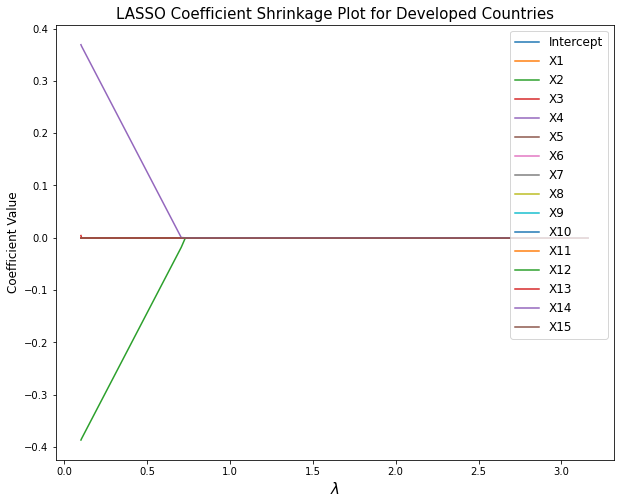%0A" class="jp-needs-light-background" />

## Results<a href="#Results" class="anchor-link">¶</a>

Our result shows that at the best lambda of 0.018376562003881724, our
variables selection model that best predict the life expectancy of
developed countries, contain the variables: "Income composition of
resources" and "thinness 1-19 years".

Our result also shows that variables such as "Polio", "Total
Expenditure", "Diphtheria", "HIV/AIDS",and "GDP" have no effect on the
life expectancy of developed countries.

Futhermore, we can also check our result by comparing it with the
correlation between the variables and life expectancy using a
correlation table.

In \[100\]:

    #Correlation Plot
    plt.matshow(developdf.corr());
    cb_develop = plt.colorbar();

<img src="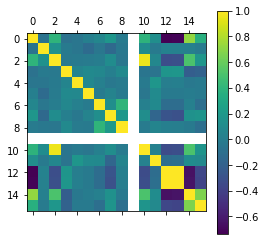%0A" class="jp-needs-light-background" />

We can see that "Thinness 1-19 years" variable has a strong negative
correlation with life expectancy, while "Income composition of
resources" variable has a strong positive correlation with a life
expectancy.

Next, we look at which variable is best in determining the life
expectancy for developing country.

In \[103\]:

    {
        "tags": [
            "hide-input",
        ]
    }

    developing = newerdf[newerdf["Status"] == "Developing"].copy() #developing countries subset
    developingdf = developing.drop(columns = ["Status"]).copy()

    #Standardization for developing
    p = developingdf.shape[1]-1
    from sklearn.model_selection import train_test_split
    X = developingdf.iloc[:,1:p+1].values
    y = developingdf["Life expectancy"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

    Z_train = X_train.copy()
    for i in range(15):
        mean = np.mean(X_train[:,i]) #training set mean for predictor i.
        std = np.std(X_train[:,i]) #training set standard deviation for predictor i.
        Z_train[:,i] = (Z_train[:,i] - mean)/std #standardization of predictors in the test set.
    mean = np.mean(y_train)
    std = np.std(y_train)
    yz_train = (y_train.copy()-mean)/std

    Z_test = X_test.copy()
    for i in range(15):
        mean = np.mean(X_train[:,i]) #training set mean for predictor i.
        std = np.std(X_train[:,i]) #training set standard deviation for predictor i.
        Z_test[:,i] = (Z_test[:,i] - mean)/std #standardization of predictors in the test set.
    mean = np.mean(y_train)
    std = np.std(y_train)
    yz_test = (y_test.copy()-mean)/std



    #Lasso for developing
    from sklearn.model_selection import RepeatedKFold
    folds = RepeatedKFold(n_splits=10, n_repeats=5, random_state= 0)

    lambdas=np.logspace(-10,-1.4,1000)
    lasso_model = linmod.LassoCV(alphas=lambdas, cv=folds)
    lasso_model.fit(Z_train, yz_train)
    print("Best lambda (developing) = ", lasso_model.alpha_) 
    print("Intercept (developing) = ", lasso_model.intercept_)
    print("Slopes (developing) = ", lasso_model.coef_)
    lasso_lamba = lasso_model.alpha_
    lasso_slopes = lasso_model.coef_


    best_Lmod = linmod.Lasso(alpha=lasso_model.alpha_)
    best_Lmod.fit(Z_train, yz_train)
    best_Lmod_yhat = best_Lmod.predict(Z_test)
    LASSO_test_r2 = r2_score(yz_test, best_Lmod_yhat)
    print("Test R^2 (developing) =  ", LASSO_test_r2)
    lasso_r2 = LASSO_test_r2


    coef = []
    intercept = []
    plot_lambdas = np.logspace(-1,0.5,100)
    for i in plot_lambdas:
        ls = linmod.Lasso(alpha=i)
        ls.fit(Z_train, yz_train)
        coef.append(ls.coef_) 
        intercept.append(ls.intercept_)
    plt.figure(figsize=(10,8))
    plt.plot(plot_lambdas, intercept, label="Intercept")
    plt.plot(plot_lambdas, coef, label=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15"])
    plt.xlabel("$\lambda$", size=15)
    plt.title("LASSO Coefficient Shrinkage Plot for Developing Countries", size=15)
    plt.ylabel("Coefficient Value", size=12)
    plt.legend(fontsize=12);

    Best lambda (developing) =  0.0033413650366041063
    Intercept (developing) =  -7.772965377266003e-16
    Slopes (developing) =  [-0.09288333  0.1086753  -0.01516402  0.01231072  0.12940297  0.02896776
      0.00854794  0.04235508 -0.44743105 -0.          0.         -0.
     -0.02531255  0.22641639  0.32942389]
    Test R^2 (developing) =   0.7836168341213494

<img src="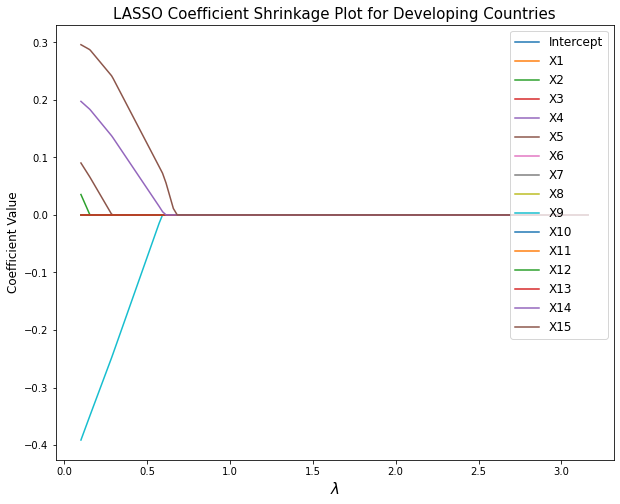%0A" class="jp-needs-light-background" />

Our result shows that at the best lambda of 0.0033413650366041063, our
variables selection model that best predicts the life expectancy of
developing countries contains the variables: "Income composition of
resources", "Schooling", "Percentage expenditure", "BMI", and
"HIV/AIDS".

Our result also shows that variables such as "GDP", "Thinness 1 - 19",
and "Population" do not affect the life expectancy of developing
countries.

In \[32\]:

    plt.matshow(developingdf.corr());
    cb_developing = plt.colorbar();

<img src="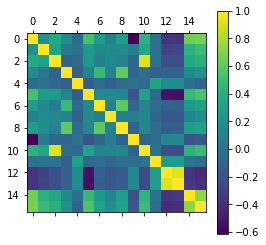%0A" class="jp-needs-light-background" />

## Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

In our report, we explored two main questions: 1) Are health or monetary
predictors better for predicting the life expectancy of a country? 2)
Which variable is best in predicting life expectancy in developed
countries…in developing countries? We wanted to answer these questions
to help in suggesting a country with which area should be given
importance to efficiently improve the life expectancy of its population.

Question 1:

From our Multiple Regression "Beta Values of the Health and Monetary
Predictors (MR)" bar chart, in terms of health predictors, HIV/AIDS had
the biggest coefficient of -.40. HIV/AIDS adds the most to the
prediction model. As HIV/AIDs rates get higher, life expectancy
decreases. In terms of monetary predictors, schooling and income
composition of resources are the top predictors with their beta values
being .34 and .24, respectively. Schooling and ICOR, contribute most to
the prediction model. As the rate of schooling and productive use of
resources gets higher, life expectancy increases.

From our Ridge Regresion "Beta Values of the Health and Monetary
Predictors (Ridge)" bar chart, in terms of health predictors, HIV/AIDS
again has the highest beta value with -.395. In terms of monetary
predictors, schooling and income composition of resources are again the
top predictors with their beta values being .330 and .244, respectively.
It is followed by health expenditure per GDP per capita at .096.

Despite our results, we can’t accurately answer whether only health or
only monetary predictors are the best in predicting life expectancy.

There were some limitations to our result. There were several null
values that were encountered, so data cleaning was essential. Next,
there were more health predictors than monetary in the data set. Because
of this, our model would be skewed towards health predictors. There are
other predictors that were not included in this dataset that could
potentially contribute in predicting life expectancy.

What we gained from our results were that governments should invest more
heavily in HIV/AIDS care. Lowering rates of this disease can potentially
raise its people's life expectancies. Parallelly, governments can also
invest in schooling and make better use of their resources to
significantly increase their people's life expectancy.

Question 2:

From LASSO regression, we determined that at the best lambda of
0.018376562003881724, our variables selection model that best predict
the life expectancy of developed countries, contain the variables:
"Income composition of resources" and "thinness 1-19 years". On the
other hand, our result shows that at the best lambda of
0.0033413650366041063, our variables selection model that best predicts
the life expectancy of developing countries contains the variables:
"Income composition of resources", "Schooling", "Percentage
expenditure", "BMI", and "HIV/AIDS".

While it appears that developing countries have more variable that is
impactful to predict life expectancy than developed countries, it is
interesting to see that just "Income composition of resources" is
included in those variable while "Thinness 10-19 years" is tossed out by
our model. It is also interesting to see that developing countries
contain the "HIV/AIDS" variable while it is tossed out in the developed
countries model.

One limitation to our result is the test r-square of 0.6442241456731739
from our developed countries model, which is a bit low compared to the
r-square of 0.7836168341213495 from our developing countries model. This
could be explained due to us having only 300 observations from developed
countries and 2000 observations from developing countries after cleaning
up our data. In the future, we would like to gather additional data
(2015 - current) into our dataset, so that we could increase the
r-square of our model.

A future question we might have is seeing that since the two models
contain a different set of variables, what variable is best in
predicting life expectancy in our original data frame.